In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [25]:
batch_size = 128
epochs = 10
learning_rate = 0.0001
hidden_size = 32

In [26]:
train_dataset = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, shuffle=True)

In [27]:
class Autoencoder(nn.Module):

  def __init__(self):
    super().__init__()


    self.encoder = nn.Sequential(
        nn.Linear(28*28, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, 2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(2, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, 28*28),
        nn.Sigmoid(),
    )


  def forward(self, x):
    encoded = self.encoder(x.view(-1, 28*28))
    decoded = self.decoder(encoded)

    return decoded


In [28]:
criterion = nn.MSELoss()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
def train(epoch):
  model.train()
  train_loss = 0
  for batch_idx, (data, _) in enumerate(train_loader):
    data = data.to(device)
    optimizer.zero_grad()
    recon_batch = model(data)
    loss = criterion(recon_batch, data.view(-1, 28*28))
    loss.backward()
    train_loss += loss.item()
    optimizer.step()
  print("Epoch: {} Loss: {:.4f}".format(epoch, train_loss / len(train_dataset)))

In [30]:
for epoch in range(1, epochs + 1):
  train(epoch)

Epoch: 1 Loss: 0.0078
Epoch: 2 Loss: 0.0061
Epoch: 3 Loss: 0.0059
Epoch: 4 Loss: 0.0059
Epoch: 5 Loss: 0.0058
Epoch: 6 Loss: 0.0058
Epoch: 7 Loss: 0.0058
Epoch: 8 Loss: 0.0058
Epoch: 9 Loss: 0.0057
Epoch: 10 Loss: 0.0057


In [31]:

def enc_dec(sample_idx):
  model.eval()

  with torch.no_grad():
    data, _ = train_dataset[sample_idx]
    data = data.to(device)
    encoded = model.encoder(data.view(-1, 28*28))
    decoded = model.decoder(encoded).cpu()

  return data, decoded.view(1, 28, 28)


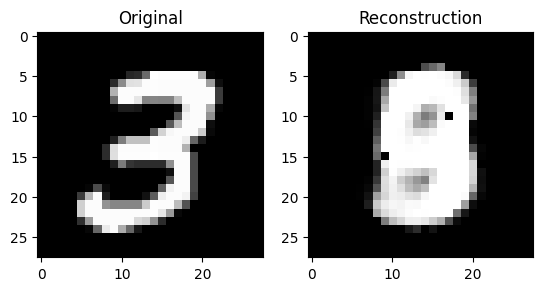

In [32]:
sample_idx = 7
original, reconstructed = enc_dec(sample_idx)



plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(original.view(28, 28).cpu(), cmap="gray")

plt.subplot(1,2,2)
plt.title("Reconstruction")
plt.imshow(reconstructed.view(28, 28).cpu(), cmap="gray")

plt.show()

In [33]:
model.eval()
with torch.no_grad():
  data = train_dataset.data.float()
  data = data.to(device)
  latent = model.encoder(data.view(-1, 28*28))

In [34]:
latent.shape

torch.Size([60000, 2])

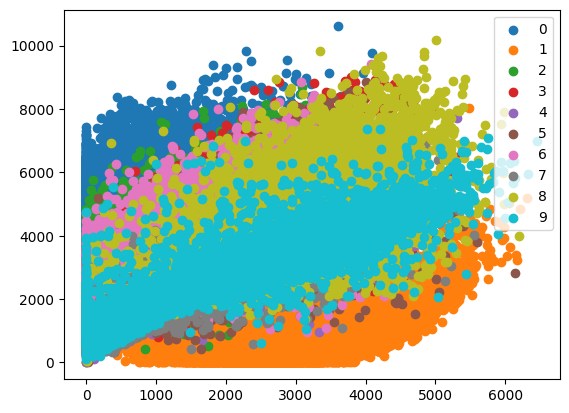

In [38]:
for i in range(10):
  ind = (train_dataset.targets == i).nonzero()
  data = latent[ind]
  plt.scatter(data[:,:,0].cpu(), data[:,:,1].cpu(), label=str(i))
plt.legend()
plt.show()